Statistiques descriptives pour les effort:
count      4766.000000
mean      16584.591272
std       31338.591894
min           0.000000
25%        1800.000000
50%        5060.000000
75%       15107.500000
max      489696.000000
Name: Effort, dtype: float64


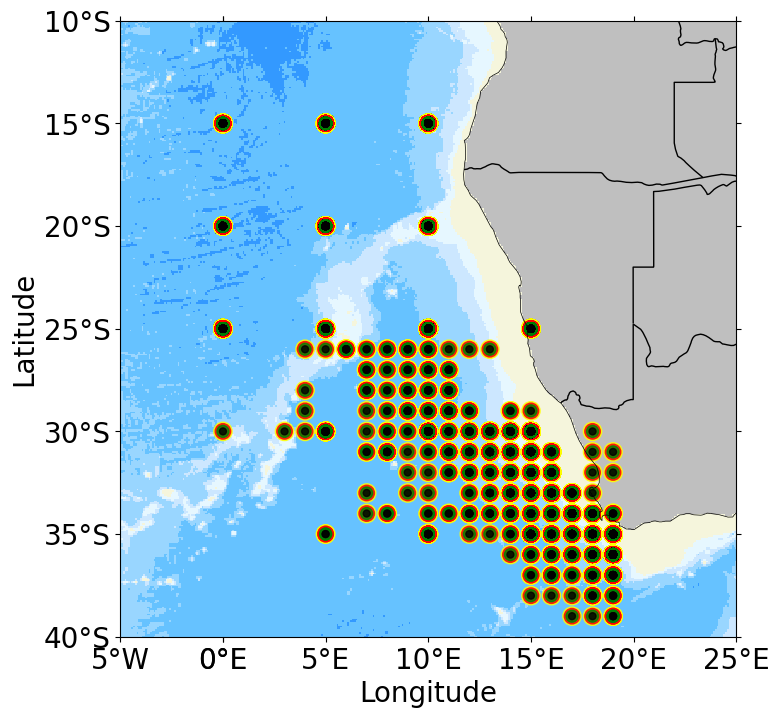

: 

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib.cm import ScalarMappable
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import pandas as pd
import matplotlib.colors as colors
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import netCDF4 as nc
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm


# Charger les donnees 

bathy_ds = xr.open_dataset('D:/2019-2020-2021/data/GLO-MFC_001_030_mask_bathy.nc')
tuna_data1 = pd.read_csv('D:/2019-2020-2021/data/tuna_data_namzaf0122.csv', encoding='latin-1')
#tuna_data1 = pd.read_csv('D:/2019-2020-2021/data/tuna01_22namzaf.csv')

depth = bathy_ds['deptho']
lat = bathy_ds['latitude']
lon = bathy_ds['longitude']

def format_coordinate(coord, coordinate_type='lat'):
    if coordinate_type == 'lat':
      
       if coord < 0:
           return f'{abs(coord)}°S'
       else:
           return f'{abs(coord)}°N'
    if coordinate_type == 'lon':
      
       if coord < 0:
           return f'{abs(coord)}°W'
       else:
           return f'{abs(coord)}°E'


y_ticks = [-40, -35, -30, -25, -20, -15, -10]
y_ticks_labels = [format_coordinate(y, 'lat') for y in y_ticks]
#y_ticks_labels = [f'{y}°S' for y in y_ticks]

x_ticks = [-5, 0, 5, 0, 10, 15, 20, 25]
#x_ticks_labels = [f'{x}°E' for x in x_ticks]
x_ticks_labels = [format_coordinate(x, 'lon') for x in x_ticks]


fig = plt.figure(figsize=(8,8))
ax = plt.axes(projection=ccrs.PlateCarree())
#Add coastlines
ax.coastlines(resolution='50m', color='black', linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle='-')
ax.add_feature(cfeature.LAND, alpha=0.5, edgecolor='black', color = 'gray')
#ax.add_feature(cfeature.OCEAN)
ax.set_xlim([-5, 25])
ax.set_ylim([-40, -10])

colors =['#f5f5dc', '#e6f7ff', '#cce7ff', '#99d6ff', '#66c2ff', '#3399ff', '#0066cc', '#003d7a','#001a4d']
#cmap='RdBu_r'
# 2. Carte de chaleur avec seuil pour les valeurs extrêmes

im1 = ax.pcolormesh(
    #ax.pcolormesh()
    bathy_ds.longitude, 
    bathy_ds.latitude, 
    bathy_ds['deptho'],
    cmap= ListedColormap(colors),
    vmin=0,
    vmax=10000
)
#ax.set_title(f'Rossby number (value {vmax:.2f})')
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks_labels, fontsize=20)

ax.set_xticks(x_ticks, minor=False)
ax.set_xticklabels(x_ticks_labels, minor=False, fontsize=20)
ax.tick_params(axis= 'both', which='both',
               top=True, bottom=True,
               left=True, right=True)

#ax.xaxis.set_label_position('top')
ax.set_xlabel('Longitude',fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
#ax.grid(True, linestyle='--', alpha=0.6)
#fig.colorbar(im1, ax=ax, label='Depth(m)', shrink=0.2, pad=0.02, orientation ='horizontal')




scatter1 = ax.scatter(tuna_data1['longitude'], tuna_data1['latitude'], 
                       c=tuna_data1['Catch_ALB'], cmap=ListedColormap(['#FFFF00']),
                       s=175, alpha=0.8)
scatter2 = ax.scatter(tuna_data1['longitude'], tuna_data1['latitude'], 
                     c=tuna_data1['Catch_BET'], cmap=ListedColormap(['#FF0000']),
                     s=125, alpha=0.8)
scatter3 = ax.scatter(tuna_data1['longitude'], tuna_data1['latitude'], 
                     c=tuna_data1['Catch_SWO'], cmap=ListedColormap(['#008000']),
                     s=75, alpha=0.8)
scatter4 = ax.scatter(tuna_data1['longitude'], tuna_data1['latitude'], 
                     c=tuna_data1['Catch_YFT'], cmap=ListedColormap(['#000000']),
                     s=25, alpha=0.8)

#ax.grid(linestyle='--', alpha=0.6)
#ax1.set_xlabel('Longitude', fontsize=14)
#ax1.set_ylabel('Latitude', fontsize=25)
#ax1.set_yticks(y_ticks)
#ax1.set_yticklabels(y_ticks_labels, fontsize=20) 
#ax1.set_xticks(x_ticks, minor=False)
#ax1.set_xticklabels(x_ticks_labels, minor=False, fontsize=20)
#ax1.set_xlim([-0.5, 20])
#ax1.tight_layout()
from scipy.interpolate import griddata
# Interpoler les valeurs capture sur cette grille
points = np.column_stack((tuna_data1['longitude'], tuna_data1['latitude']))
values = tuna_data1['Effort'].values

# Statistiques descriptives
print("Statistiques descriptives pour les effort:")
print(tuna_data1['Effort'].describe())


